In [47]:
import pandas as pd
import numpy as np
full_df = pd.read_csv(open('xxx', 'r'), sep='\t')

In [48]:
full_df = full_df.dropna().reset_index()[full_df.columns[3:]]

In [49]:
full_df.UNIQUE_IDENTIFIER.value_counts()

0    9111
1     802
Name: UNIQUE_IDENTIFIER, dtype: int64

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm

test = []
train = []
cv = KFold(n_splits=3, random_state=42, shuffle=False)
for train_index, test_index in cv.split(full_df):

    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    train.append(train_index)
    test.append(test_index)
    # Class count
    count_class_0, count_class_1 = full_df.UNIQUE_IDENTIFIER[train_index].value_counts()

    # Divide by class
    full_df_0 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 0]
    full_df_1 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 1]

    df_class_1_over = full_df_1.sample(count_class_0, replace=True)
    df_train_over = pd.concat([full_df_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_train_over.UNIQUE_IDENTIFIER.value_counts())
    
    X_train,y_train = df_train_over.text,df_train_over[df_train_over.columns[5:6]]
    X_test,y_test = full_df.iloc[test_index].text,full_df.iloc[test_index][full_df.columns[5:6]]

    vectorizer = TfidfVectorizer(min_df=0.025,max_df=0.7,  max_features=30000, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(2, 2), use_idf=1,smooth_idf=1,
            stop_words = 'english')

    x_train =  vectorizer.fit_transform(X_train)
    x_test = vectorizer.transform(X_test)
    
    log = LogisticRegression()
    svm_m = svm.LinearSVC(random_state=12, tol=1e-5)
    nb = MultinomialNB()
    labels = ['1', '0']
    log.fit(x_train, y_train['UNIQUE_IDENTIFIER'])
    svm_m.fit(x_train, y_train['UNIQUE_IDENTIFIER'])
    nb.fit(x_train, y_train['UNIQUE_IDENTIFIER'])
    # calculating test accuracy
    prediction_log = log.predict(x_test)
    prediction_svm = svm_m.predict(x_test)
    prediction_nb = nb.predict(x_test)
    
    cm_log = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_log)
    print(cm_log)
    cm_svm = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_svm)
    print(cm_svm)
    cm_nb = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_nb)
    print(cm_nb)

    print('log')
    print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_log, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))
    print('svm')
    print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_svm, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))
    print('nb')
    print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_nb, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))
    print("\n")
    

Train Index:  [3305 3306 3307 ..., 9910 9911 9912] 

Test Index:  [   0    1    2 ..., 3302 3303 3304]
Random over-sampling:
1    6008
0    6008
Name: UNIQUE_IDENTIFIER, dtype: int64


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[2843  260]
 [ 153   49]]
[[2754  349]
 [ 136   66]]
[[3048   55]
 [ 187   15]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.95      0.92      0.93      3103
   POSITIVE       0.16      0.24      0.19       202

avg / total       0.90      0.88      0.89      3305

svm
             precision    recall  f1-score   support

   NEGATIVE       0.95      0.89      0.92      3103
   POSITIVE       0.16      0.33      0.21       202

avg / total       0.90      0.85      0.88      3305

nb
             precision    recall  f1-score   support

   NEGATIVE       0.94      0.98      0.96      3103
   POSITIVE       0.21      0.07      0.11       202

avg / total       0.90      0.93      0.91      3305



Train Index:  [   0    1    2 ..., 9910 9911 9912] 

Test Index:  [3305 3306 3307 ..., 6606 6607 6608]
Random over-sampling:
1    6088
0    6088
Name: UNIQUE_IDENTIFIER, dtype: int64


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[2617  406]
 [ 146  135]]
[[2639  384]
 [ 152  129]]
[[2828  195]
 [ 237   44]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.95      0.87      0.90      3023
   POSITIVE       0.25      0.48      0.33       281

avg / total       0.89      0.83      0.86      3304

svm
             precision    recall  f1-score   support

   NEGATIVE       0.95      0.87      0.91      3023
   POSITIVE       0.25      0.46      0.32       281

avg / total       0.89      0.84      0.86      3304

nb
             precision    recall  f1-score   support

   NEGATIVE       0.92      0.94      0.93      3023
   POSITIVE       0.18      0.16      0.17       281

avg / total       0.86      0.87      0.86      3304



Train Index:  [   0    1    2 ..., 6606 6607 6608] 

Test Index:  [6609 6610 6611 ..., 9910 9911 9912]
Random over-sampling:
1    6126
0    6126
Name: UNIQUE_IDENTIFIER, dtype: int64


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[2537  448]
 [  89  230]]
[[2585  400]
 [  90  229]]
[[2243  742]
 [  95  224]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.97      0.85      0.90      2985
   POSITIVE       0.34      0.72      0.46       319

avg / total       0.91      0.84      0.86      3304

svm
             precision    recall  f1-score   support

   NEGATIVE       0.97      0.87      0.91      2985
   POSITIVE       0.36      0.72      0.48       319

avg / total       0.91      0.85      0.87      3304

nb
             precision    recall  f1-score   support

   NEGATIVE       0.96      0.75      0.84      2985
   POSITIVE       0.23      0.70      0.35       319

avg / total       0.89      0.75      0.80      3304





In [117]:
test_index = test[2]
train_index = train[2]
count_class_0, count_class_1 = full_df.UNIQUE_IDENTIFIER[train_index].value_counts()

# Divide by class
full_df_0 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 0]
full_df_1 = full_df.iloc[train_index][full_df['UNIQUE_IDENTIFIER'] == 1]

df_class_1_over = full_df_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([full_df_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.UNIQUE_IDENTIFIER.value_counts())

X_train,y_train = df_train_over.text,df_train_over[df_train_over.columns[5:6]]
X_test,y_test = full_df.iloc[test_index].text,full_df.iloc[test_index][full_df.columns[5:6]]

vectorizer = TfidfVectorizer(min_df=0.025,max_df=0.7,  max_features=30000, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(2, 4), use_idf=1,smooth_idf=1,
        stop_words = 'english')

x_train =  vectorizer.fit_transform(X_train)
x_test = vectorizer.transform(X_test)

log = LogisticRegression()

log.fit(x_train, y_train['UNIQUE_IDENTIFIER'])

# calculating test accuracy
prediction_log = log.predict(x_test)

cm_log = confusion_matrix(y_test['UNIQUE_IDENTIFIER'], prediction_log)
print(cm_log)


print('log')
print(classification_report(y_test['UNIQUE_IDENTIFIER'], prediction_log, labels=list(set(y_test['UNIQUE_IDENTIFIER'])), target_names=['NEGATIVE', 'POSITIVE']))


/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/3arthzneiz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Random over-sampling:
1    6126
0    6126
Name: UNIQUE_IDENTIFIER, dtype: int64
[[2545  440]
 [  98  221]]
log
             precision    recall  f1-score   support

   NEGATIVE       0.96      0.85      0.90      2985
   POSITIVE       0.33      0.69      0.45       319

avg / total       0.90      0.84      0.86      3304



In [150]:
false_negative = X_test[(y_test['UNIQUE_IDENTIFIER'] == 1) & (prediction_log == 0)]
false_postive = X_test[(y_test['UNIQUE_IDENTIFIER'] == 0) & (prediction_log == 1)]
true_postive = X_test[(y_test['UNIQUE_IDENTIFIER'] == 1) & (prediction_log == 1)]
true_negative = X_test[(y_test['UNIQUE_IDENTIFIER'] == 0) & (prediction_log == 0)]

In [147]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

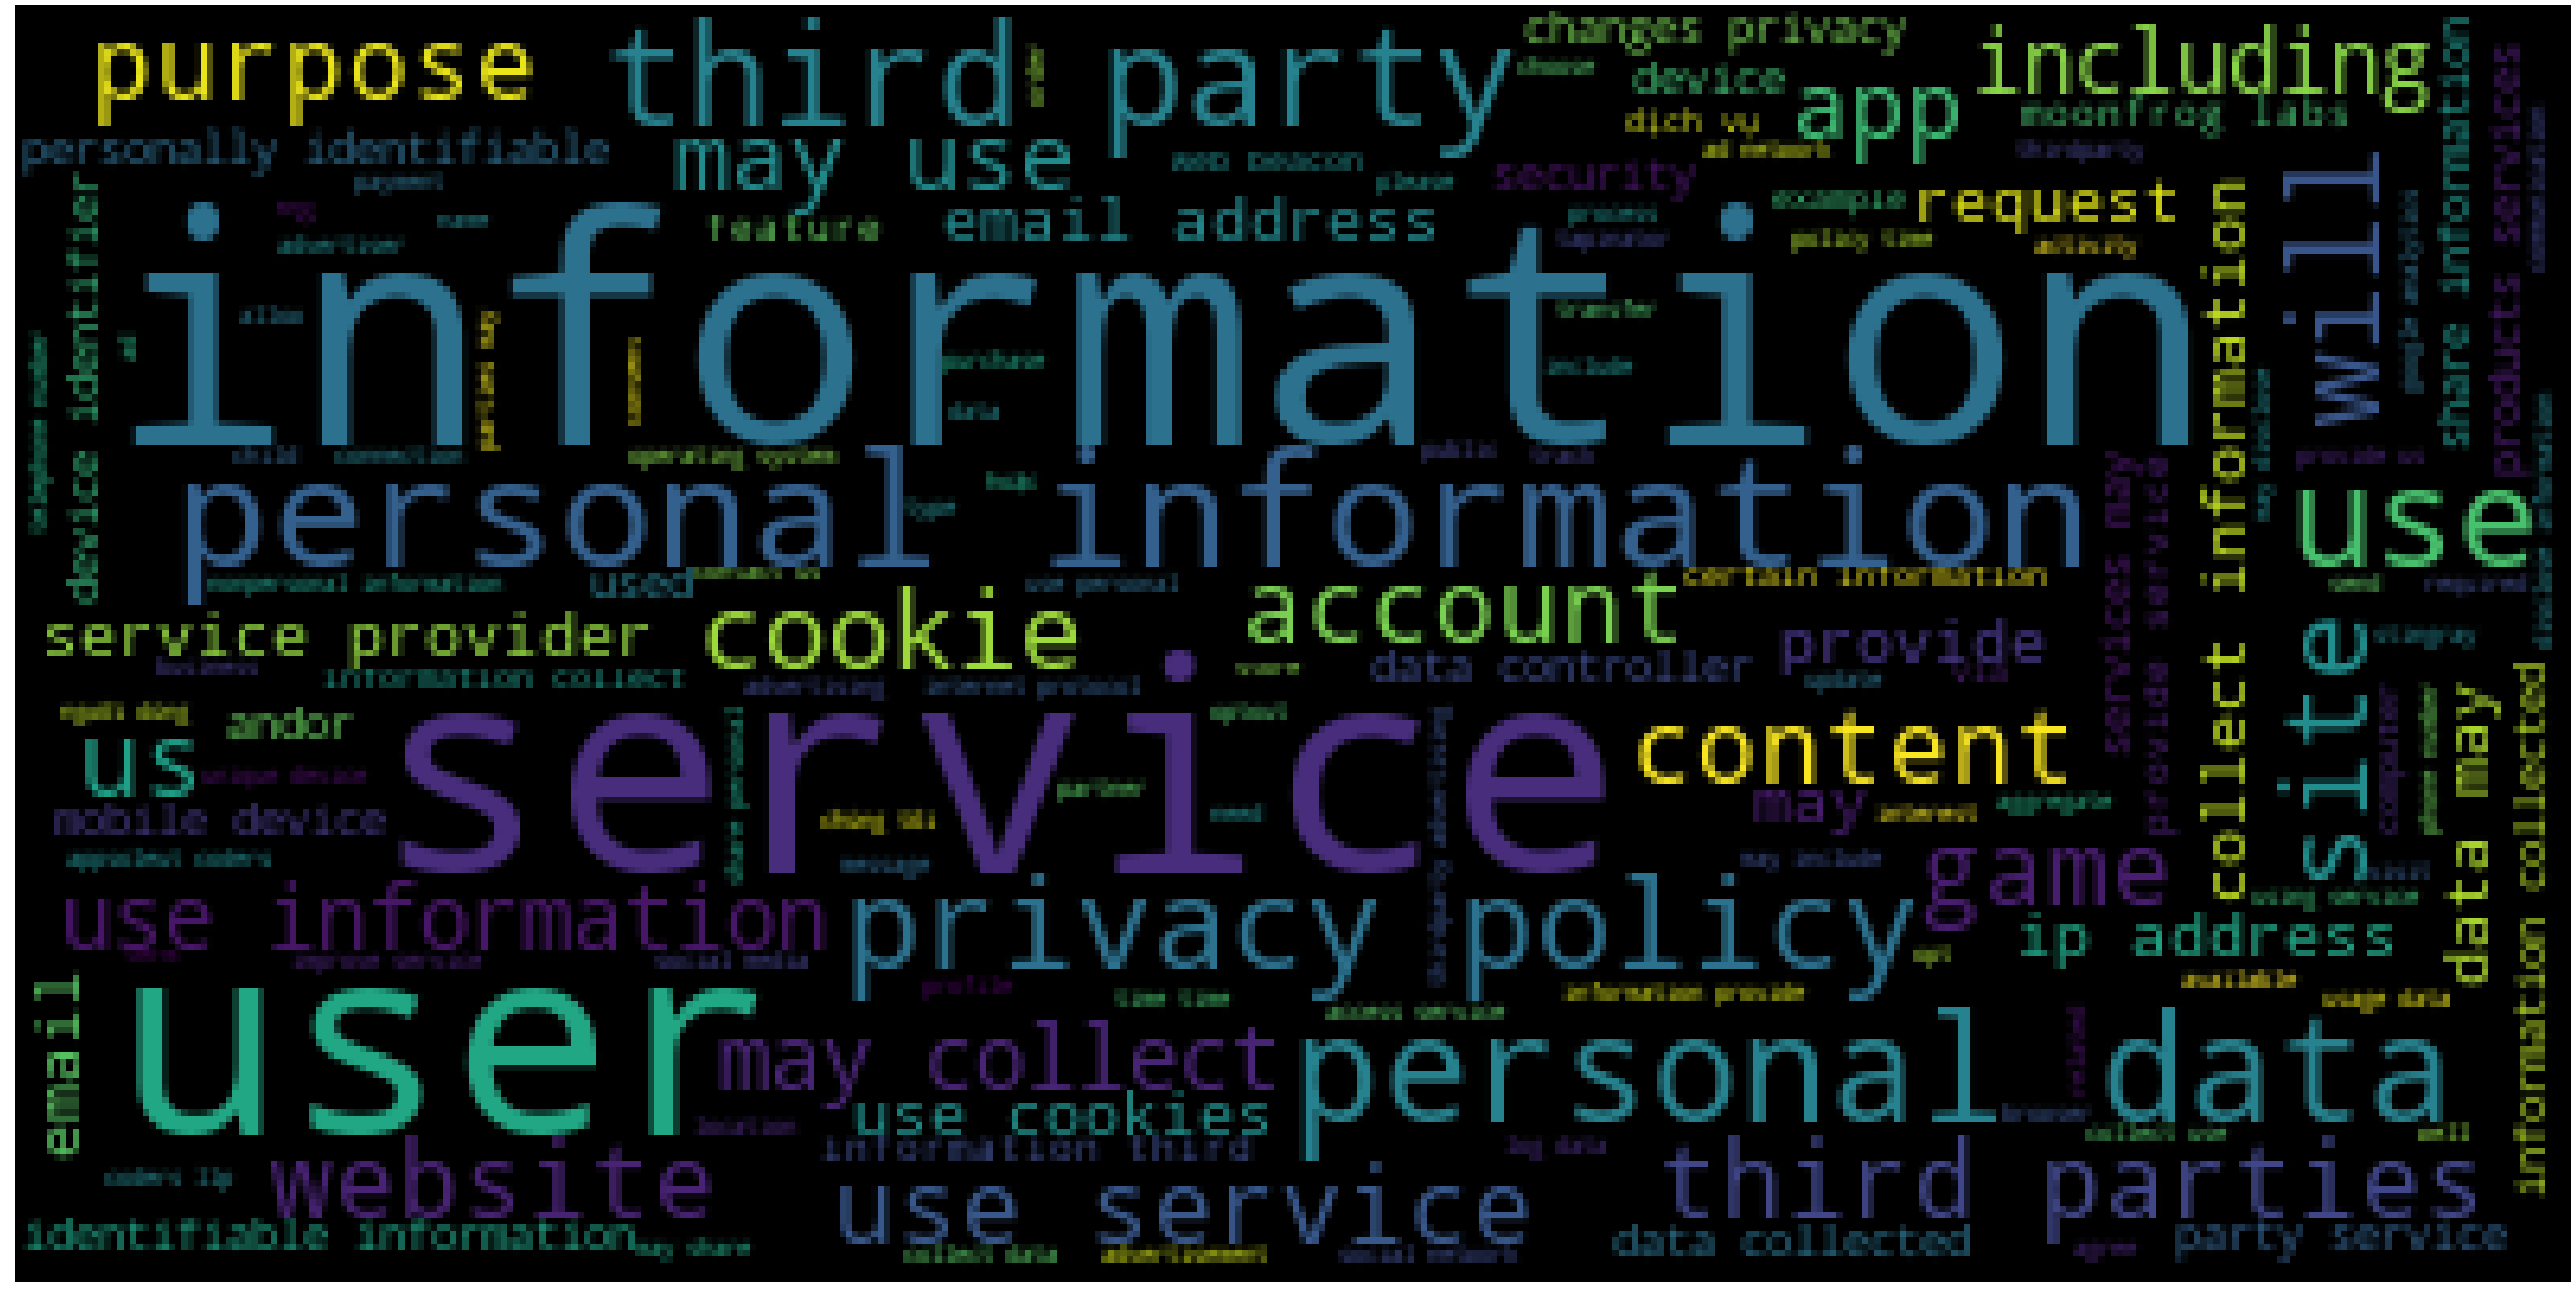

In [148]:
wc(false_negative,'black','Common Words' )

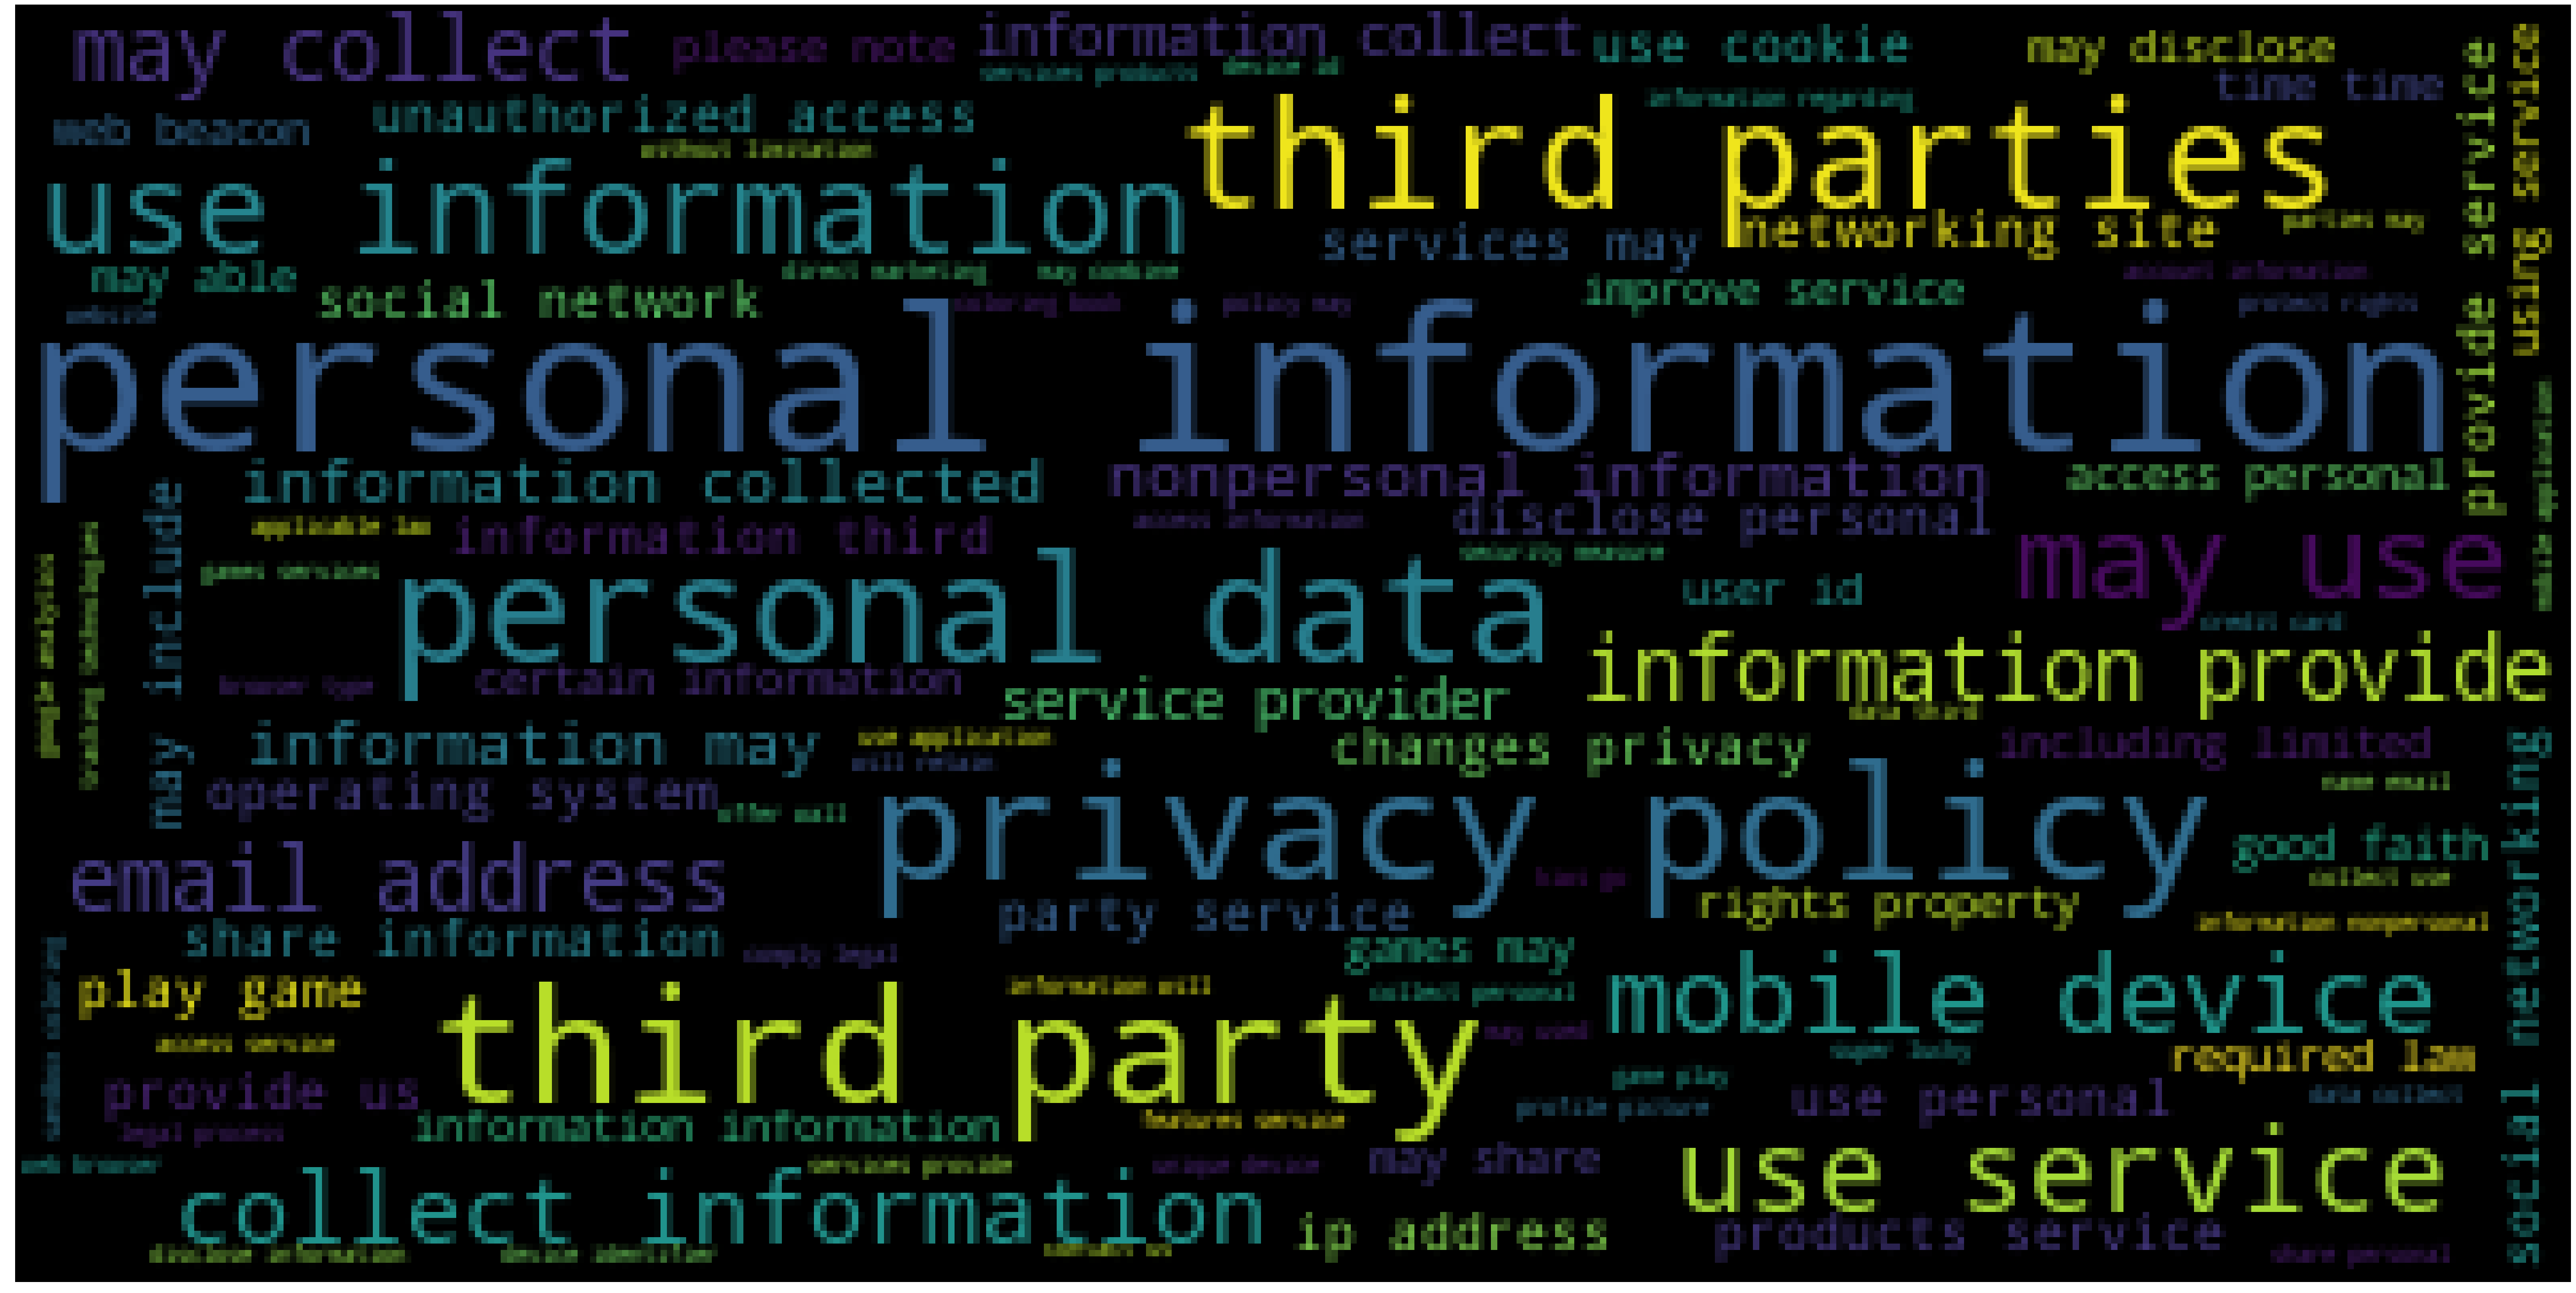

In [149]:
wc(false_postive,'black','Common Words' )

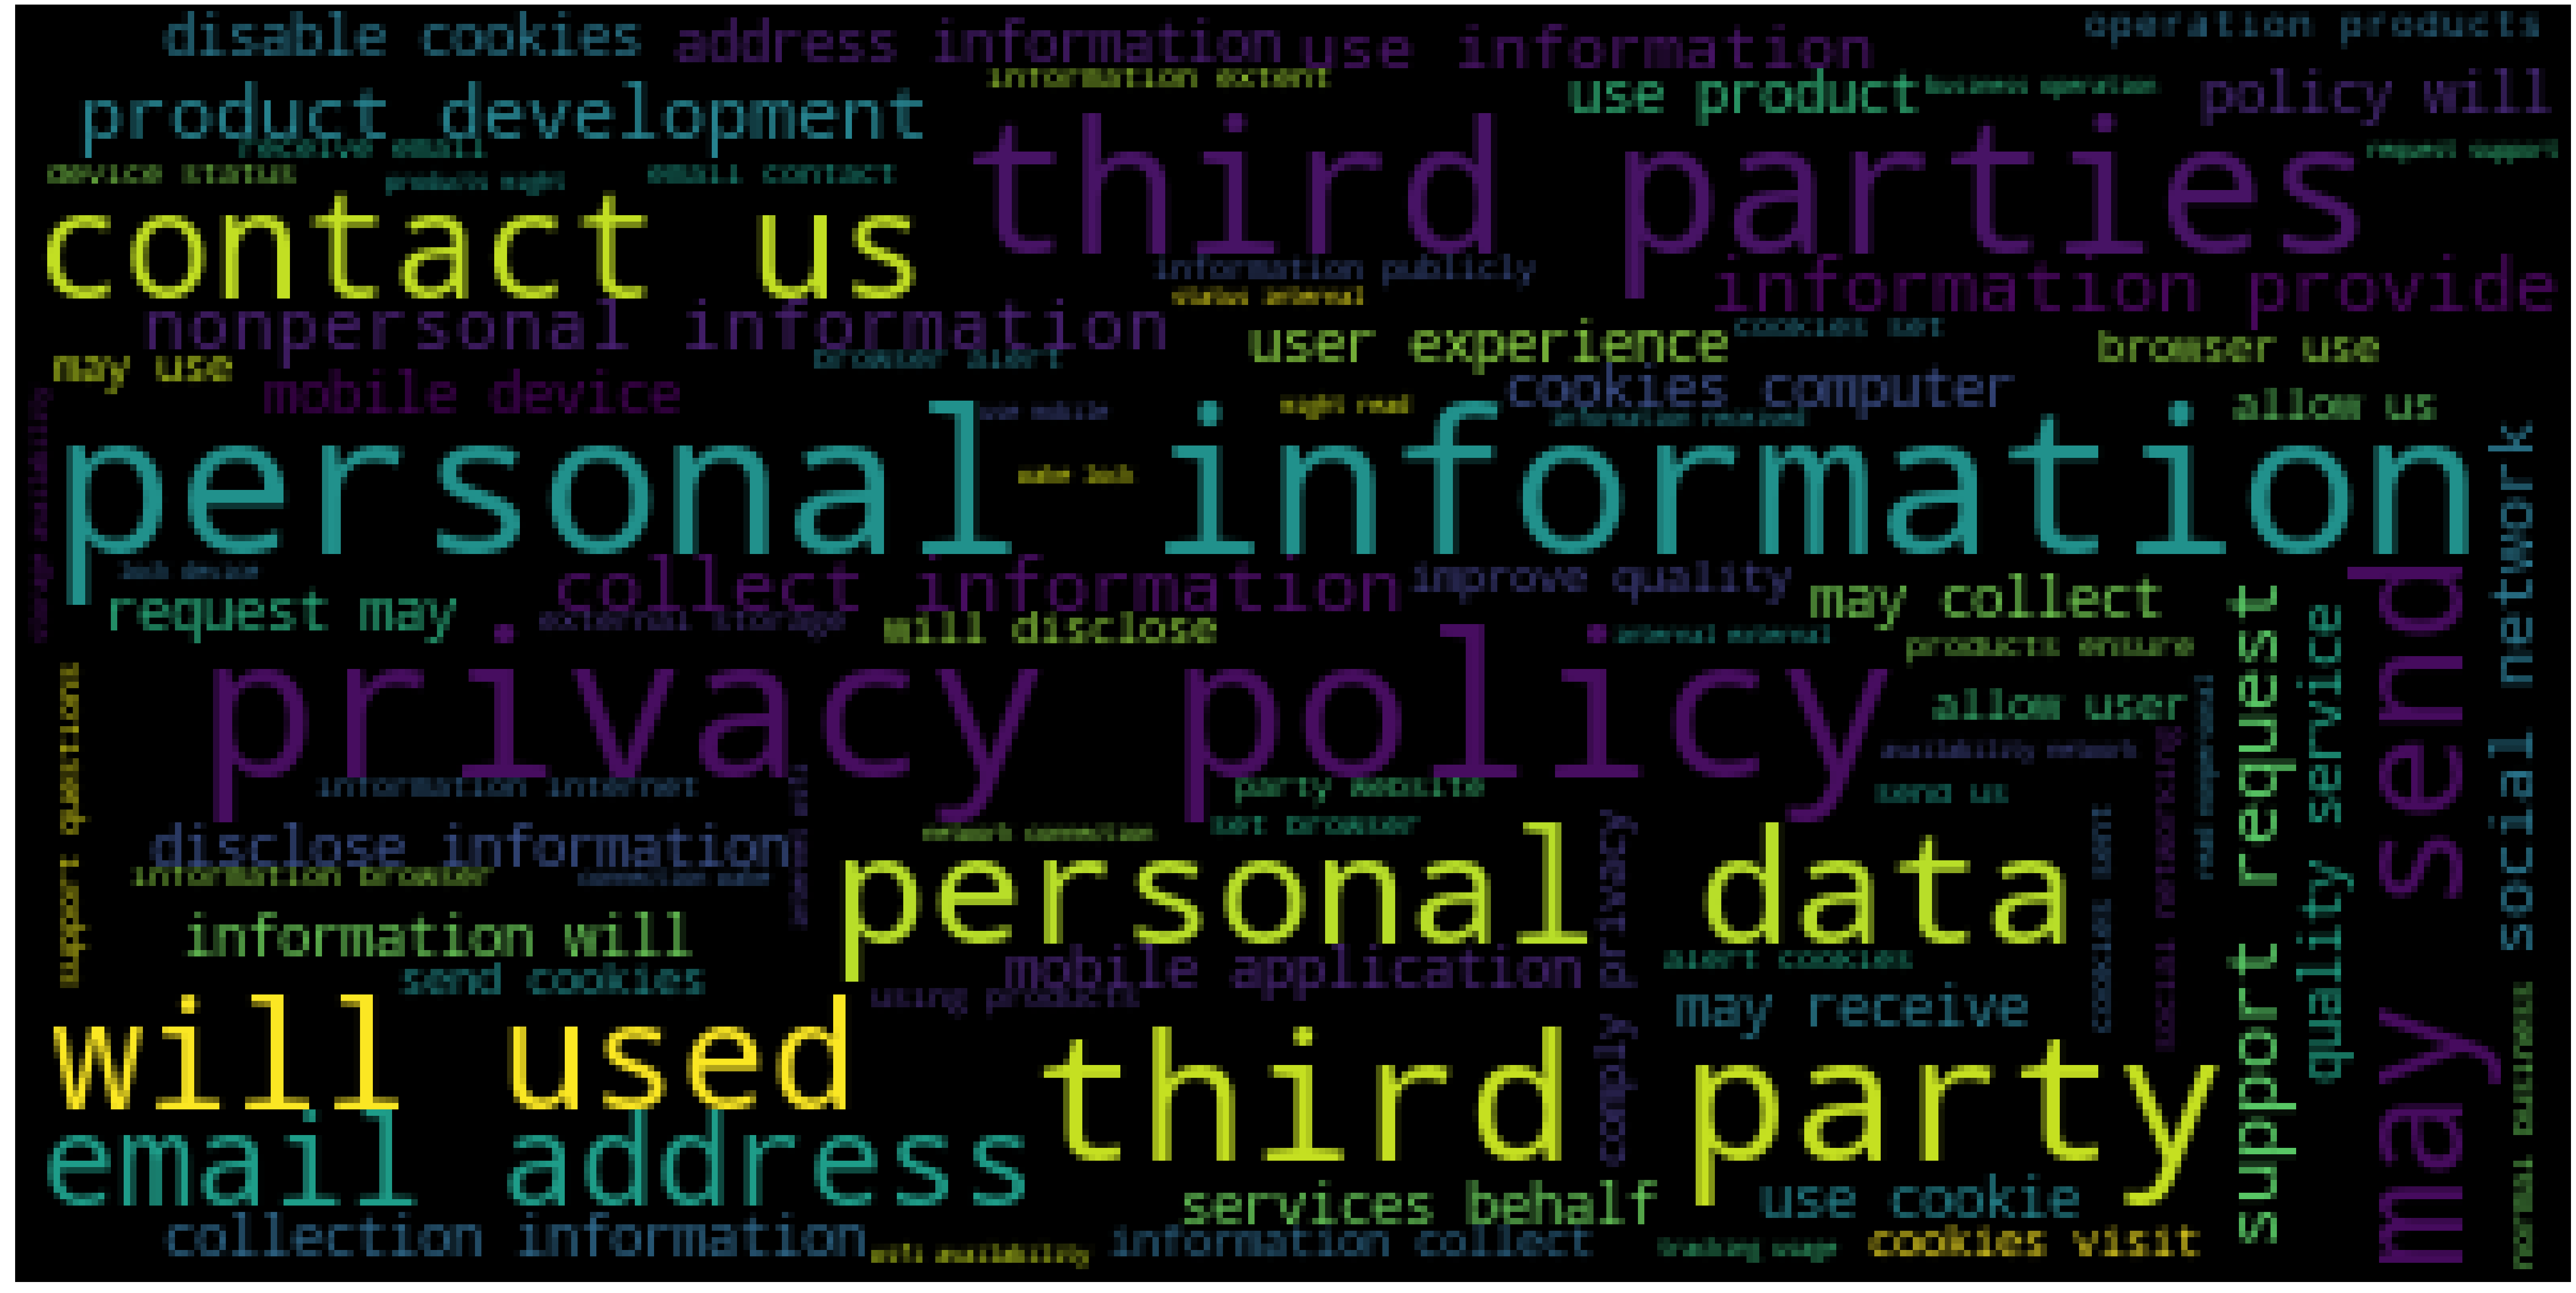

In [151]:
wc(true_postive,'black','Common Words' )

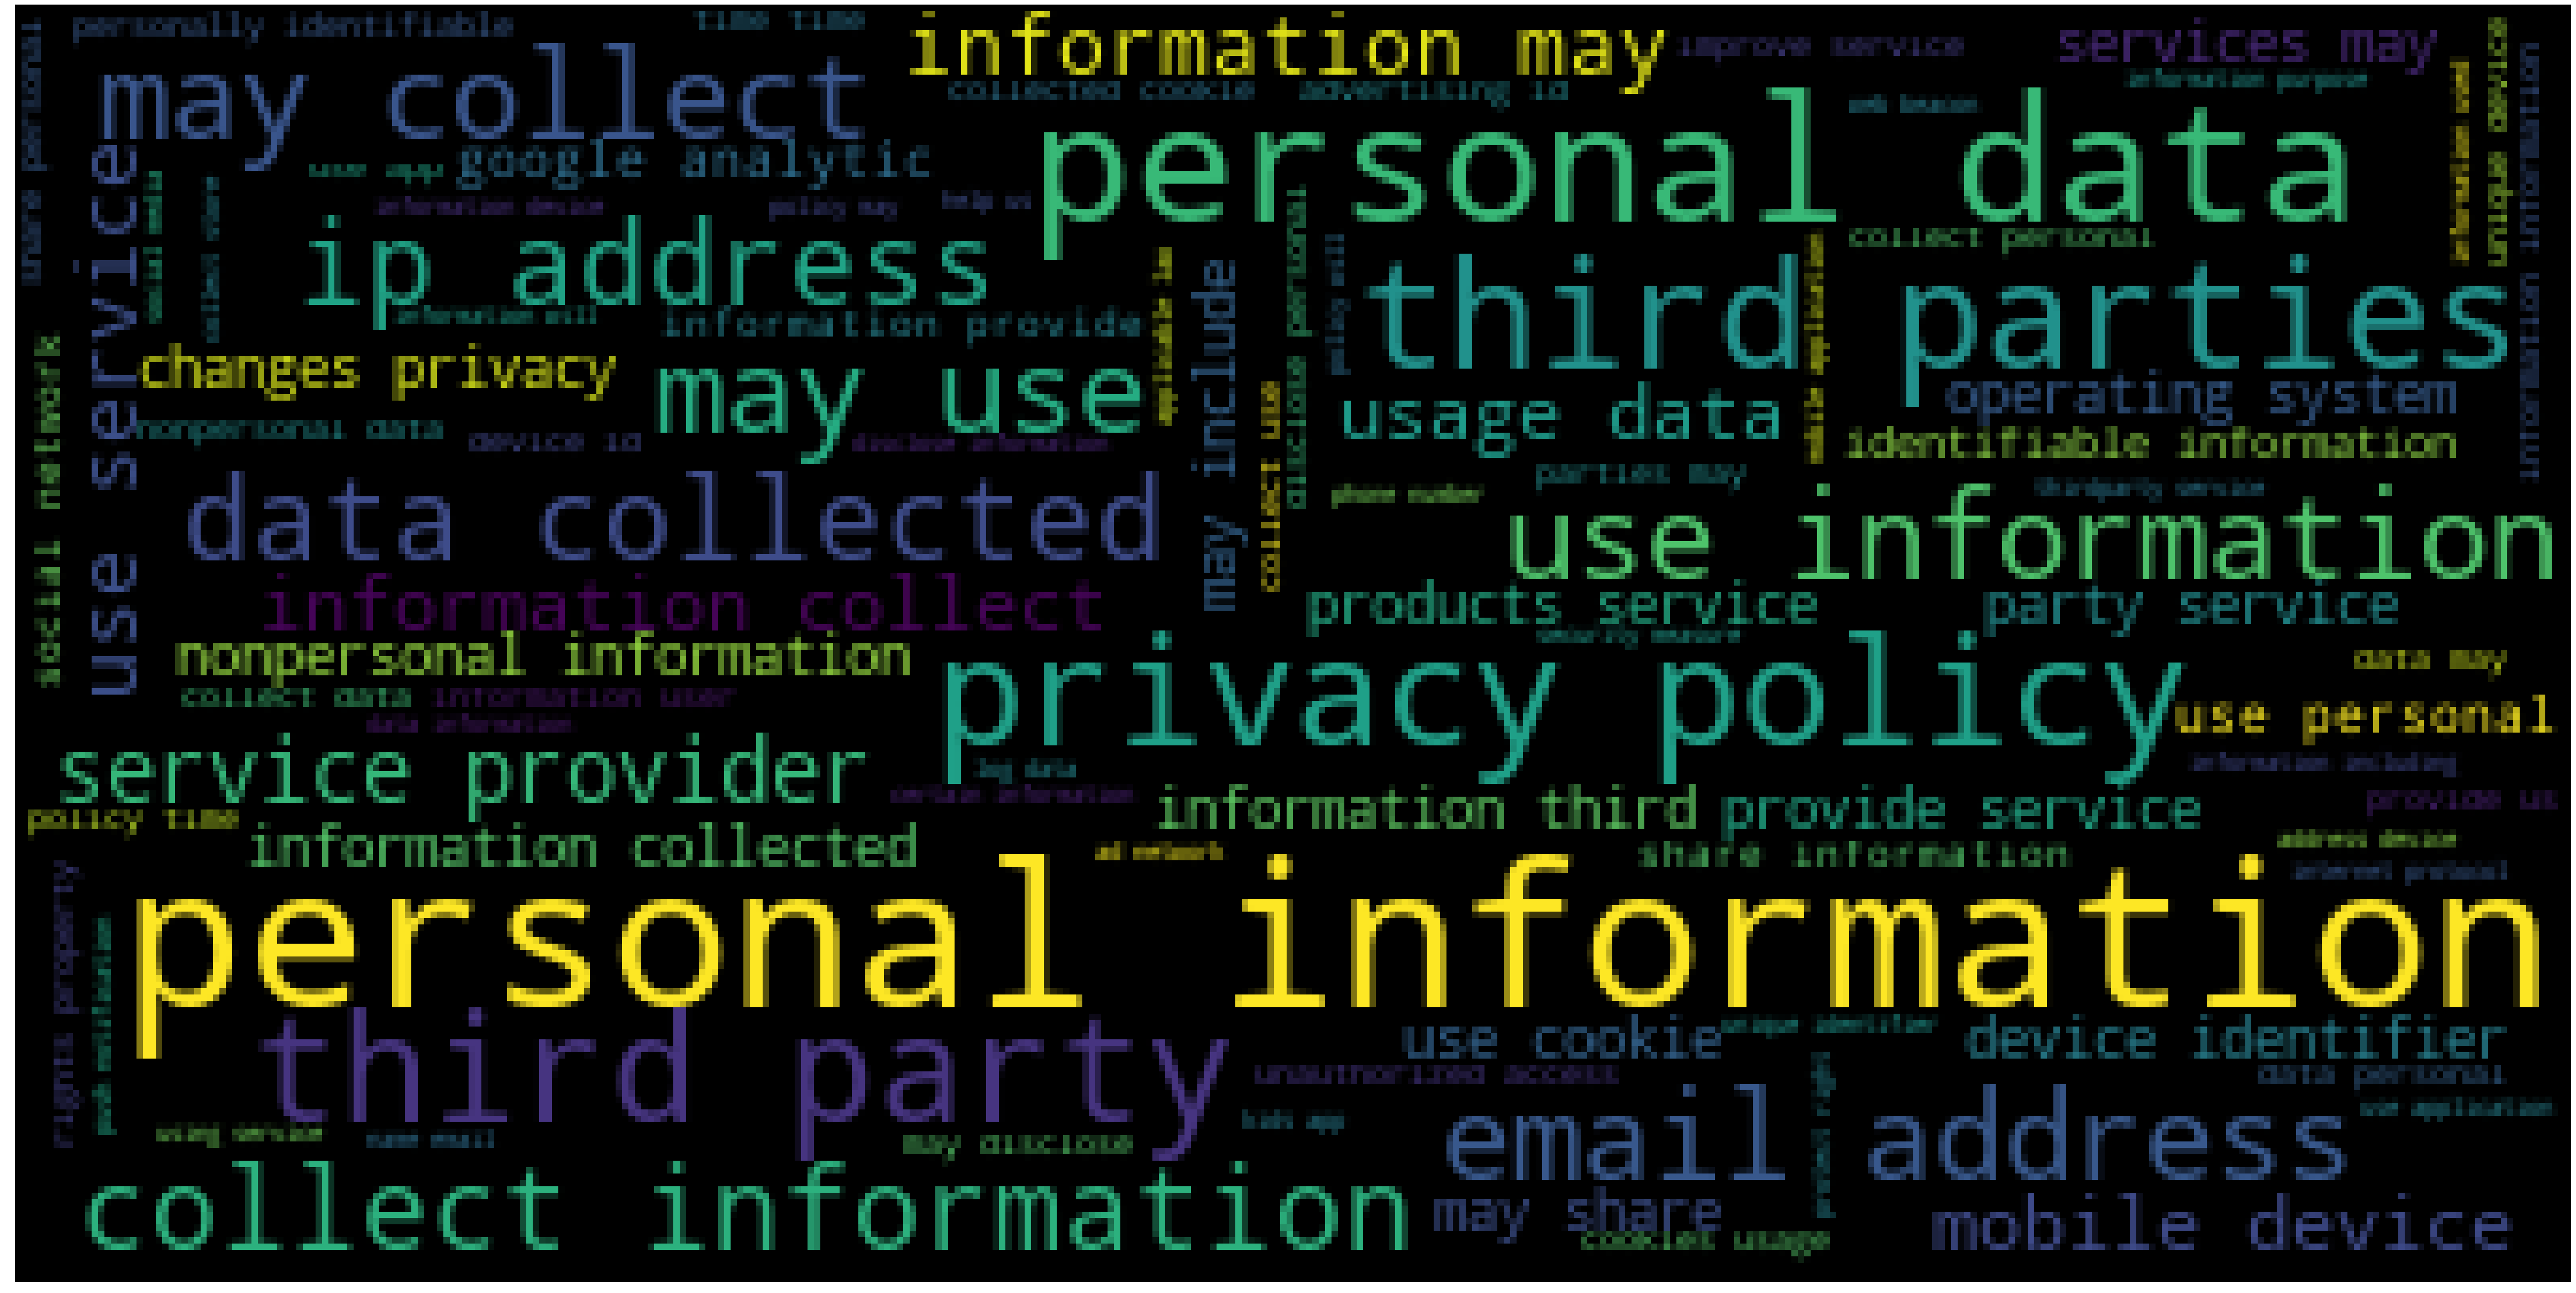

In [152]:
wc(true_negative,'black','Common Words' )